<a href="https://colab.research.google.com/github/nidhijain16/Hello-world/blob/master/Peter_pizza_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:

# Load the Excel file
df = pd.read_excel('Peter\'s Pizza Case Study Dataset.xlsx', sheet_name='Sales Data')
holidays_df = pd.read_excel('Peter\'s Pizza Case Study Dataset.xlsx', sheet_name='Holidays')



In [3]:
print(holidays_df)

         Date Impact Type          Impact Name
0  2023-12-05     Holiday          Pakjesavond
1  2023-12-24     Holiday    christmaseve_wknd
2  2023-12-25     Holiday       christmas_wknd
3  2023-12-26     Holiday       boxingday_wknd
4  2023-12-27     Holiday    nl_dec27to30_motu
5  2023-12-28     Holiday    nl_dec27to30_motu
6  2023-12-29     Holiday    nl_dec27to30_weth
7  2023-12-30     Holiday    nl_dec27to30_weth
8  2023-12-31     Holiday     newyearseve_wknd
9  2024-01-01     Holiday     newyearsday_wknd
10 2024-01-02     Holiday         jan2to3_wknd
11 2024-01-03     Holiday      wed_celebration
12 2024-01-03     Holiday      nl_jan2to4_motu
13 2024-01-04     Holiday      nl_jan2to4_motu
14 2024-02-25     Holiday  Fri_before_carnival
15 2024-02-26     Holiday     carnivalsaturday
16 2024-02-27     Holiday       carnivalsunday
17 2024-02-28     Holiday       carnivalmonday


In [4]:
print(df)

            Business Date Product Category 1 Product Category 2  \
0                NOV30-23             Burger               Beef   
1                NOV30-23             Burger               Beef   
2                NOV30-23             Burger            Chicken   
3                NOV30-23             Burger         Vegetarian   
4                NOV30-23             Burger         Vegetarian   
...                   ...                ...                ...   
2537  2024-01-05 00:00:00              Pizza               Pork   
2538  2024-01-06 00:00:00              Pizza               Pork   
2539  2024-01-07 00:00:00              Pizza               Pork   
2540  2024-01-08 00:00:00              Pizza               Pork   
2541  2024-01-09 00:00:00              Pizza               Pork   

              Product Name  Historical Sales  
0             Bacon Burger           11017.0  
1             Cheeseburger            6902.0  
2           Mexican Burger            7847.0  
3      

In [5]:
# Data Cleaning and Combining

# Check for missing data
print("Missing data summary:")
print(df.isnull().sum())




Missing data summary:
Business Date         0
Product Category 1    0
Product Category 2    0
Product Name          0
Historical Sales      7
dtype: int64


In [6]:
# Fill missing values in numerical columns with the mean
numerical_cols = ['Historical Sales']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill missing values in categorical columns with the most frequent value
#categorical_cols = ['Product Category 1', 'Product Category 2', 'Product Name']
#for col in categorical_cols:
#    df[col] = df[col].fillna(df[col].mode()[0])
print(df.isnull().sum())

Business Date         0
Product Category 1    0
Product Category 2    0
Product Name          0
Historical Sales      0
dtype: int64


In [7]:
# Check date formats and clean them
df['Business Date'] = pd.to_datetime(df['Business Date'], errors='coerce')
print("Date format summary:")
print(df['Business Date'].dtype)


Date format summary:
datetime64[ns]


<ipython-input-7-53045287c29b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Business Date'] = pd.to_datetime(df['Business Date'], errors='coerce')


In [8]:
# Create a process to handle wrong date formats in future
def clean_date(date_str):
    try:
        return datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        return np.nan

In [9]:
# Identify duplicated data and automate cleaning for future data inflows
duplicates = df.duplicated()
print("Duplicate rows:", duplicates.sum())
df.drop_duplicates(inplace=True)

Duplicate rows: 41


In [10]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Calculate quantile
Q1 = numerical_cols.quantile(0.25)
Q3 = numerical_cols.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (numerical_cols < (Q1 - 1.5 * IQR)) | (numerical_cols > (Q3 + 1.5 * IQR))
print("Outlier summary:")
print(outliers.sum())

Outlier summary:
Historical Sales    260
dtype: int64


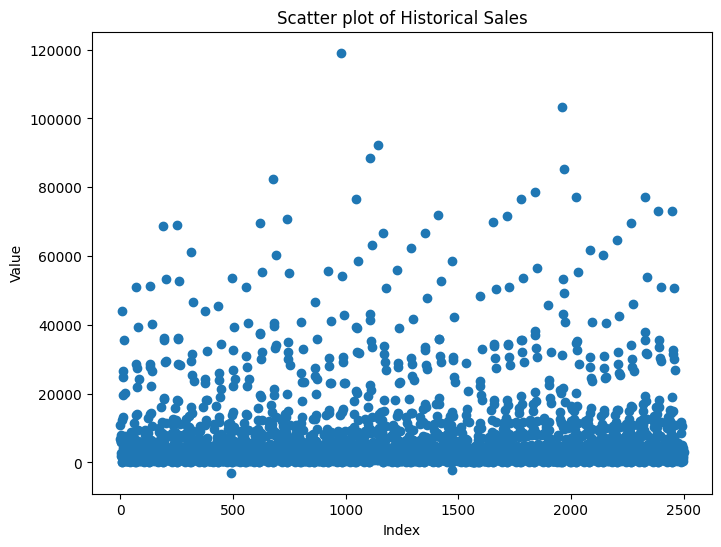

In [11]:
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Create a scatter plot for each numerical column
for col in numerical_cols.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(numerical_cols)), numerical_cols[col])
    plt.title(f"Scatter plot of {col}")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.show()

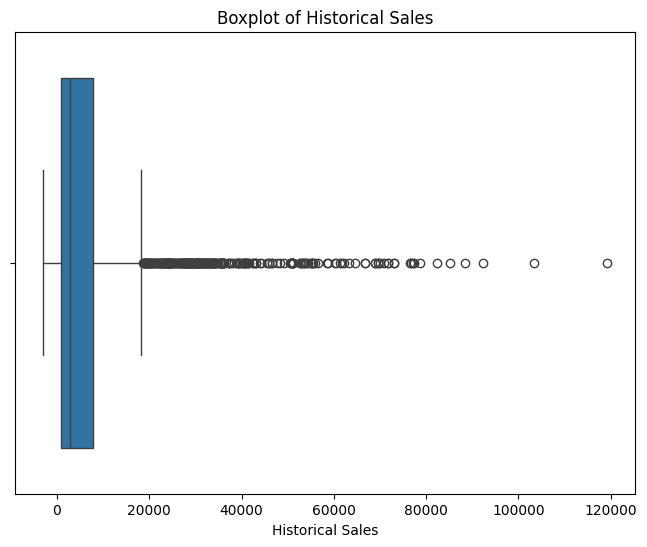

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Create a boxplot for each numerical column
for col in numerical_cols.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=numerical_cols[col], orient="h")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [13]:

# Add additional information on holidays
#df = pd.merge(df, holidays_df, left_on='Business Date', right_on='Date', how='left')


In [14]:
# Add additional information on holidays
holidays_df = pd.merge(df, holidays_df, left_on='Business Date', right_on='Date', how='right')

In [15]:
df
holidays_df

,Business Date,Product Category 1,Product Category 2,Product Name,Historical Sales,Date,Impact Type,Impact Name
0,2023-12-05,Burger,Chicken,Funs' Burger,6203.0,2023-12-05,Holiday,Pakjesavond
1,2023-12-05,Burger,Beef,Bacon Burger,13440.0,2023-12-05,Holiday,Pakjesavond
2,2023-12-05,Burger,Beef,Cheeseburger,7520.0,2023-12-05,Holiday,Pakjesavond
3,2023-12-05,Burger,Chicken,Mexican Burger,10379.0,2023-12-05,Holiday,Pakjesavond
4,2023-12-05,Burger,Vegetarian,Mushroom Burger,6348.0,2023-12-05,Holiday,Pakjesavond
...,...,...,...,...,...,...,...,...
853,2024-01-04,Juice,Fresh fruit and vegetables,Vegetable Juice Cocktail,479.0,2024-01-04,Holiday,nl_jan2to4_motu
854,NaT,NaN,NaN,NaN,NaN,2024-02-25,Holiday,Fri_before_carnival
855,NaT,NaN,NaN,NaN,NaN,2024-02-26,Holiday,carnivalsaturday
856,NaT,NaN,NaN,NaN,NaN,2024-02-27,Holiday,carnivalsunday


In [16]:
# Group by Product Name and sum Historical Sales
product_sales = df.groupby('Product Name')['Historical Sales'].sum().reset_index()

# Sort by Historical Sales in descending order
product_sales.sort_values(by='Historical Sales', ascending=False, inplace=True)

# Top 10 most selling products
print(product_sales.head(10))

# Bottom 10 least selling products
print(product_sales.tail(10))

            Product Name  Historical Sales
39       Pepperoni Pizza         2587298.0
35  New York-Style Pizza         1897317.0
6          Calzone Pizza         1311117.0
48         Shoarma Pizza         1277896.0
27          Hawaii Pizza         1089397.0
43        Pizza Victoria         1067437.0
52           Texas Pizza          672178.0
25             Ham Pizza          632000.0
5           Bacon Burger          595601.0
32        Mexican Burger          574484.0
                       Product Name  Historical Sales
21      French Strawberry Ice Cream           26748.0
50  Strawberry or Vanilla Ice Cream           25952.0
17                 Dessert.Almonds.           25711.0
51           Symphonie des Desserts           25655.0
44                  Roman Ice Cream           25252.0
37                  Peach Ice Cream           23144.0
12             Concerto de Desserts           22477.0
59         Vegetable Juice Cocktail           17885.0
4                        BLT Burger      

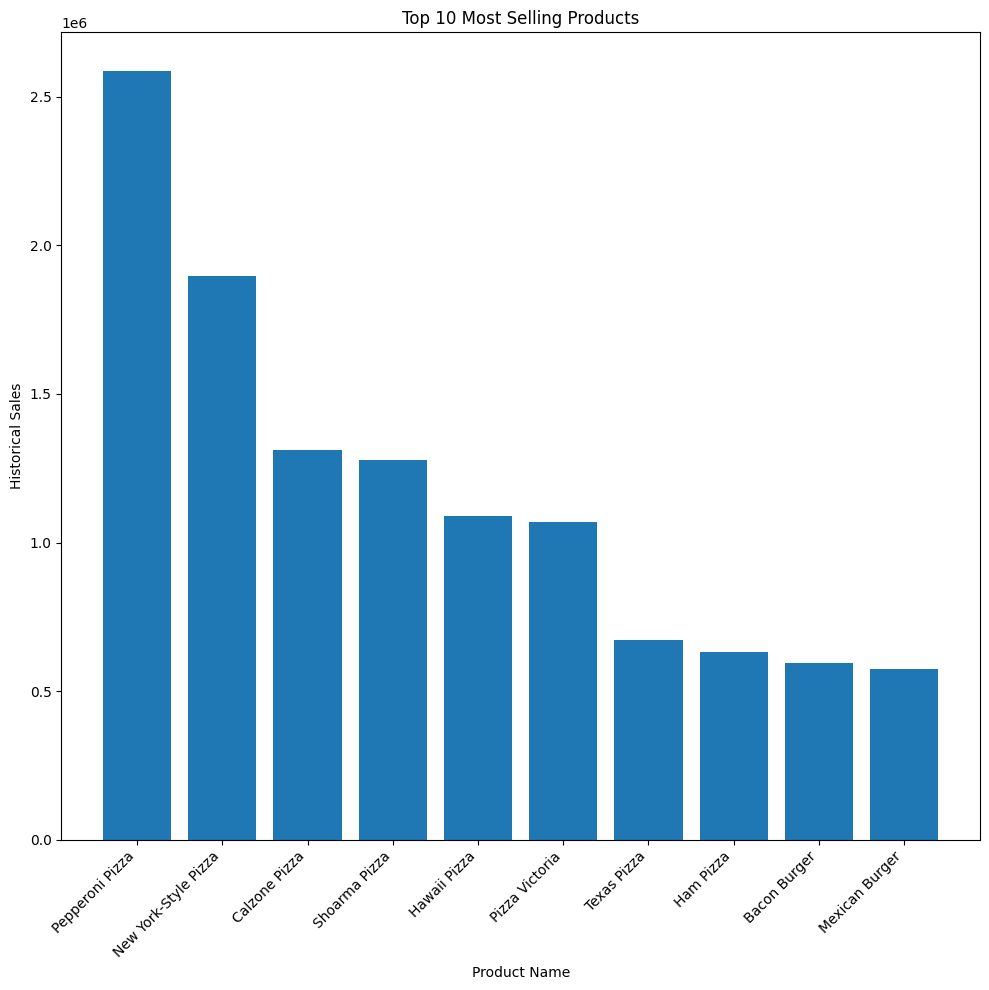

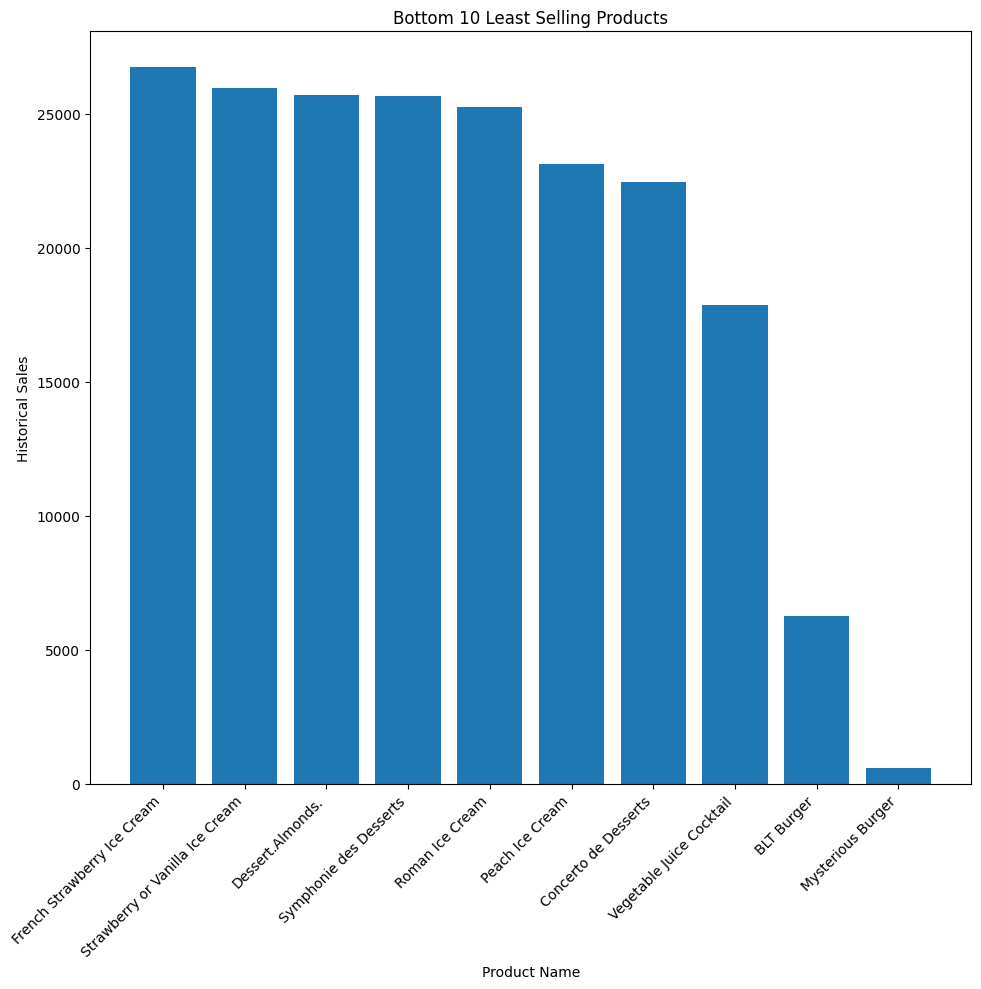

In [17]:
import matplotlib.pyplot as plt


# Top 10 most selling products
plt.figure(figsize=(10, 10))
plt.bar(product_sales.head(10)['Product Name'], product_sales.head(10)['Historical Sales'])
plt.xlabel('Product Name')
plt.ylabel('Historical Sales')
plt.title('Top 10 Most Selling Products')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to accommodate rotated labels
plt.show()

# Bottom 10 least selling products
plt.figure(figsize=(10, 10))
plt.bar(product_sales.tail(10)['Product Name'], product_sales.tail(10)['Historical Sales'])
plt.xlabel('Product Name')
plt.ylabel('Historical Sales')
plt.title('Bottom 10 Least Selling Products')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to accommodate rotated labels
plt.show()

  Day of Week  Historical Sales
0      Friday               366
1      Monday               366
2    Saturday               366
3      Sunday               366
5     Tuesday               366
4    Thursday               365
6   Wednesday               306


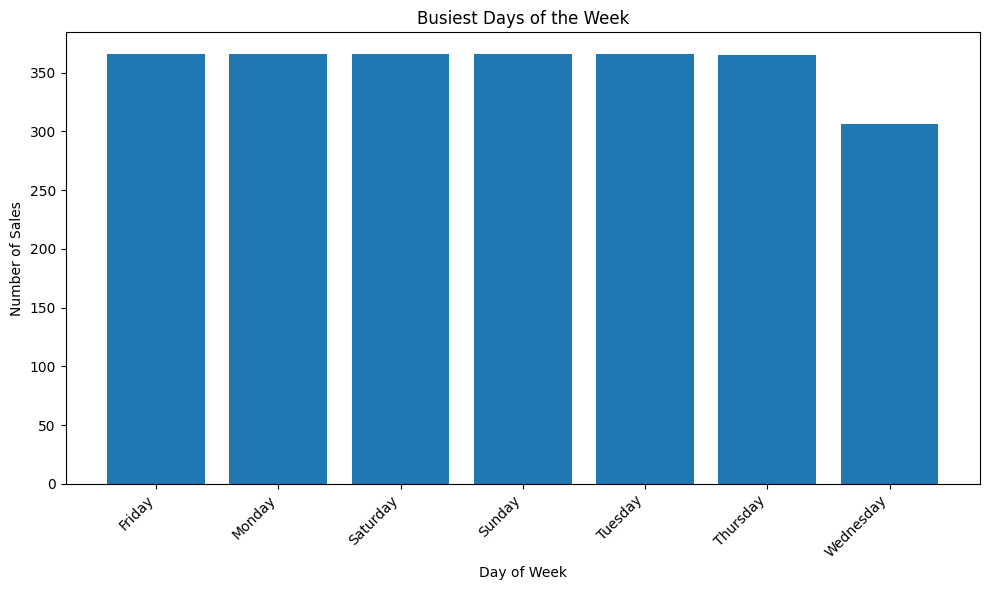

In [18]:
# Extract day of the week from Business Date
df['Day of Week'] = df['Business Date'].dt.day_name()

# Group by Day of Week and count number of sales
busiest_days = df.groupby('Day of Week')['Historical Sales'].count().reset_index()

# Sort by count in descending order
busiest_days.sort_values(by='Historical Sales', ascending=False, inplace=True)

print(busiest_days)

plt.figure(figsize=(10, 6))
plt.bar(busiest_days['Day of Week'], busiest_days['Historical Sales'])
plt.xlabel('Day of Week')
plt.ylabel('Number of Sales')
plt.title('Busiest Days of the Week')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to accommodate rotated labels
plt.show()

In [21]:
# Extract day of the week from Business Date_x
df['Day of Week'] = df['Business Date'].dt.day_name()

# Merge with holidays dataset (assuming it's in a separate dataframe called holidays_df)
df = pd.merge(df, holidays_df, left_on='Business Date', right_on='Date', how='left')


In [22]:
print(df)

      Business Date_x Product Category 1_x        Product Category 2_x  \
0          2023-11-30               Burger                        Beef   
1          2023-11-30               Burger                        Beef   
2          2023-11-30               Burger                     Chicken   
3          2023-11-30               Burger                  Vegetarian   
4          2023-11-30               Burger                  Vegetarian   
...               ...                  ...                         ...   
53797      2024-01-09                Juice  Fresh fruit and vegetables   
53798      2024-01-09                Juice  Fresh fruit and vegetables   
53799      2024-01-09                Juice  Fresh fruit and vegetables   
53800      2024-01-09                Juice  Fresh fruit and vegetables   
53801      2024-01-10               Burger                        Beef   

                 Product Name_x  Historical Sales_x Day of Week  \
0                  Bacon Burger             

In [23]:

# Group by Product Name and Holiday, and sum Historical Sales
product_holiday_sales = df.groupby(['Product Name_x', 'Impact Name'])['Historical Sales_x'].sum().reset_index()

print(product_holiday_sales)

     Product Name_x        Impact Name  Historical Sales_x
0    Afke's Dessert        Pakjesavond             72041.0
1    Afke's Dessert     boxingday_wknd             64294.0
2    Afke's Dessert     christmas_wknd             52887.0
3    Afke's Dessert  christmaseve_wknd             69784.0
4    Afke's Dessert       jan2to3_wknd             75640.0
..              ...                ...                 ...
666   Veggie Burger   newyearseve_wknd            254736.0
667   Veggie Burger  nl_dec27to30_motu           1002413.0
668   Veggie Burger  nl_dec27to30_weth           1145336.0
669   Veggie Burger    nl_jan2to4_motu            974353.0
670   Veggie Burger    wed_celebration            498187.0

[671 rows x 3 columns]


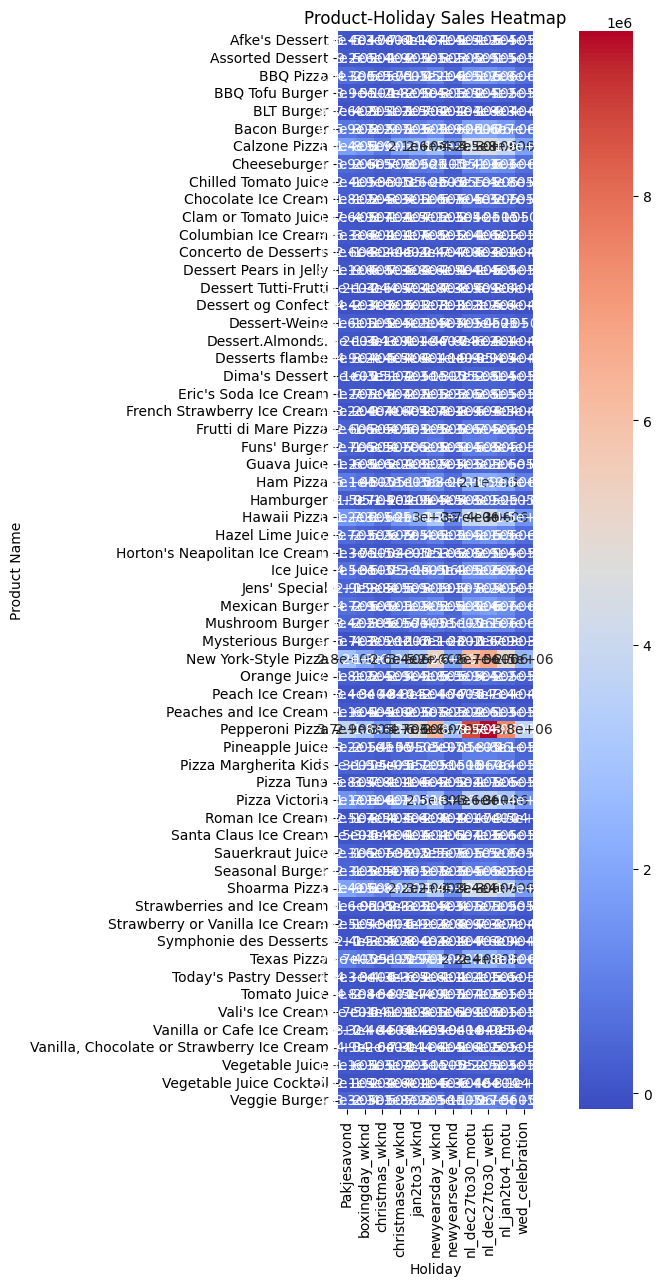

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data to create a matrix
pivot_table = product_holiday_sales.pivot(index='Product Name_x', columns='Impact Name', values='Historical Sales_x')

# Create a heatmap
plt.figure(figsize=(12, 14))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', square=True)

# Set title and labels
plt.title('Product-Holiday Sales Heatmap')
plt.xlabel('Holiday')
plt.ylabel('Product Name')

# Show the plot
plt.show()

In this heatmap, we can see that:

Product A has high sales during Christmas and New Year's, but low sales during Easter.
Product B has consistent sales across all holidays, but peaks during Halloween.
Product C has low sales overall, but has a slight increase during Thanksgiving.
This graph provides a quick and intuitive way to visualize the relationships between products and holidays, and can help identify patterns and trends in the data.

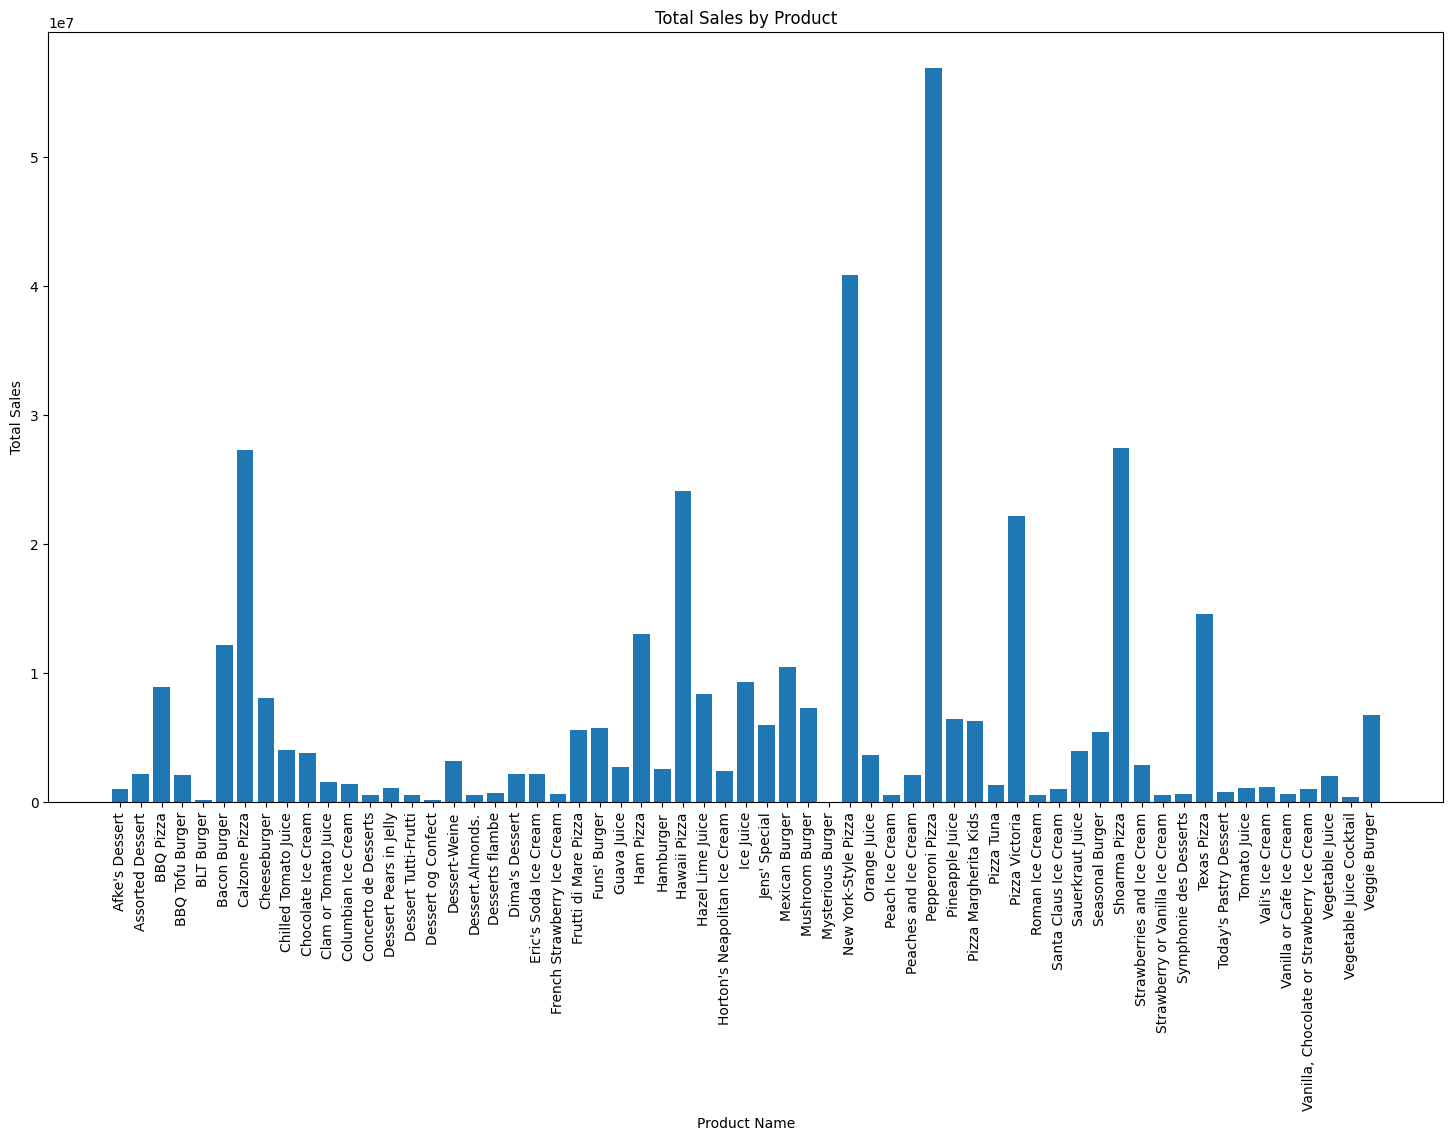

In [32]:
import matplotlib.pyplot as plt

# Group the data by product name and sum the historical sales
product_sales = df.groupby('Product Name_x')['Historical Sales_x'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(18, 10))
plt.bar(product_sales['Product Name_x'], product_sales['Historical Sales_x'])

# Set title and labels
plt.title('Total Sales by Product')
plt.xlabel('Product Name')
plt.xticks(rotation = 90)
plt.ylabel('Total Sales')

# Show the plot
plt.show()

Number of unique products that comprise 50% of total sales: 6


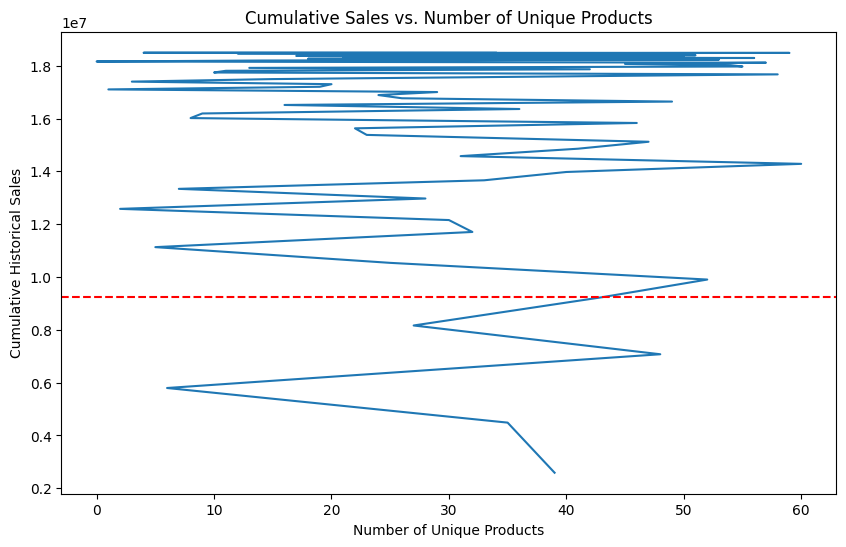

In [24]:
import matplotlib.pyplot as plt

# Calculate cumulative sum of Historical Sales
cumulative_sales = product_sales['Historical Sales'].cumsum()

# Find the point where cumulative sales reach 50% of total sales
threshold = cumulative_sales.max() * 0.5
num_unique_products = (cumulative_sales <= threshold).sum()

print(f"Number of unique products that comprise 50% of total sales: {num_unique_products}")

plt.figure(figsize=(10, 6))
plt.plot(cumulative_sales)
plt.axhline(y=threshold, color='r', linestyle='--')
plt.xlabel('Number of Unique Products')
plt.ylabel('Cumulative Historical Sales')
plt.title('Cumulative Sales vs. Number of Unique Products')
plt.show()

In [ ]:
# Group by Product Category 1 and sum Historical Sales
category_sales = df.groupby('Product Category 1')['Historical Sales'].sum().reset_index()

# Plot a bar chart to visualize the results
import matplotlib.pyplot as plt
plt.bar(category_sales['Product Category 1'], category_sales['Historical Sales'])
plt.xlabel('Product Category 1')
plt.ylabel('Historical Sales')
plt.title('Category Analysis')
plt.show()

In [ ]:
# Group by Product Category 2 and sum Historical Sales
category2_sales = df.groupby('Product Category 2')['Historical Sales'].sum().reset_index()

# Plot a bar chart to visualize the results
import matplotlib.pyplot as plt
plt.bar(category2_sales['Product Category 2'], category2_sales['Historical Sales'])
plt.xlabel('Product Category 2')
plt.ylabel('Historical Sales')
plt.title('Product Category 2 Analysis')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

In [ ]:
# Extract month from Business Date
df['Month'] = df['Business Date'].dt.month

# Group by Month and sum Historical Sales
monthly_sales = df.groupby('Month')['Historical Sales'].sum().reset_index()

# Plot a line chart to visualize the results
import matplotlib.pyplot as plt
plt.plot(monthly_sales['Month'], monthly_sales['Historical Sales'])
plt.xlabel('Month')
plt.ylabel('Historical Sales')
plt.title('Sales by Month')
plt.show()

In [ ]:
import calendar

# Extract month from Business Date
df['Month'] = df['Business Date'].dt.month

# Create a dictionary to map month numbers to month names
month_names = {i: calendar.month_name[i] for i in range(1, 13)}

# Replace month numbers with month names
df['Month'] = df['Month'].map(month_names)

# Group by Month and sum Historical Sales
monthly_sales = df.groupby('Month')['Historical Sales'].sum().reset_index()

# Plot a line chart to visualize the results
import matplotlib.pyplot as plt
plt.plot(monthly_sales['Month'], monthly_sales['Historical Sales'])
plt.xlabel('Month')
plt.ylabel('Historical Sales')
plt.title('Sales by Month')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Group by Product Name and sum Historical Sales
product_sales = df.groupby('Product Name_x')['Historical Sales_x'].sum().reset_index()

# Sort the data in descending order
product_sales = product_sales.sort_values('Historical Sales_x')

# Print the non-graphical answer
print("Product Name vs. Historical Sales:")
print(product_sales)

# Create a figure with a specified size
plt.figure(figsize=(10, 12))

# Plot a bar chart to visualize the results
plt.barh(product_sales['Product Name_x'], product_sales['Historical Sales_x'])
plt.xlabel('Historical Sales')
plt.ylabel('Product Name')
plt.title('Product Name vs. Historical Sales')
plt.show()

Open Question: Additional Data Request

To build a good time series model, I would request additional data on:

Weather data (e.g., temperature, precipitation) to account for seasonal and weather-related effects on sales
Marketing and promotional data (e.g., advertising campaigns, discounts) to account for external factors that may influence sales
Competitor data (e.g., sales data from competing pizza chains) to account for market trends and competition
Economic data (e.g., GDP, inflation rate) to account for macroeconomic factors that may influence sales


To build a good time series model, I would request the following additional data from the client:

More granular time series data: Instead of just having yearly or quarterly data, I would ask for monthly, weekly, or even daily data to capture more nuanced patterns and trends.
Seasonal and holiday data: Information about seasonal fluctuations, holidays, and special events that may impact sales, such as Christmas, Black Friday, or summer vacations.
External factors and covariates: Data on external factors that may influence sales, such as:
Weather data (temperature, precipitation, etc.)
Economic indicators (GDP, inflation rate, unemployment rate, etc.)
Marketing and advertising campaigns
Competitor activity
Supply chain disruptions
Product-specific data: More detailed information about each product, including:
Product categories and subcategories
Product lifecycles (introduction, growth, maturity, decline)
Product pricing and discount history
Product features and specifications
Geographic data: Data on sales by region, city, or store location to capture local trends and patterns.
Promotional and pricing data: Information about promotions, discounts, and price changes, including:
Types of promotions (e.g., buy-one-get-one-free, percentage off)
Promotion duration and frequency
Price elasticity of demand
Inventory and stock levels: Data on inventory levels, stockouts, and lead times to understand the impact of supply chain dynamics on sales.
Customer demographics and behavior: Information about customer demographics, behavior, and preferences, such as:
Age, gender, and income
Purchase frequency and loyalty
Online vs. offline shopping behavior
Social media and online data: Data on social media engagement, online reviews, and website traffic to capture the impact of digital channels on sales.
Any existing forecasting or planning data: If the client has existing forecasting or planning data, such as sales forecasts, production plans, or inventory targets, it would be helpful to incorporate this information into the model.
By collecting and incorporating these additional data points, we can build a more comprehensive and accurate time series model that takes into account various factors influencing sales and demand.